# Homework 1 - Ganapathy Raaman Balaji

### Question 2.1

##### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification model would be appropriate. List some (up to 5) predictors that you might use.

````
I am a Performance Analytics Engineer at Caterpillar. Performing exploratory analysis one high frequency engine and machine is my daily job. One of the projects I worked on was to classify gensets into different applications, based on the type of operation. I use Python for analysis, and used the Scikit Learn package in Python. I performed Regression Analysis on the following predictors to identify and classify the type of application based on a window of time of engine operation after ignition on.

Some of the factors are:

1. Engine RPM profile in this window (includes factors such as slope of change in a given time)
2. How much the engine is loaded in this window
3. Duration the genset engine was running
4. Generator Power Output
5. Fuel Consumption

````

### Question 2.2 (a):

##### Overall Best Solution: rbfdot seems to provide an accuracy of 99.54128% for cost value = 10000
```
Best vanilladot solution: Accuracy of 86.39144% for cost value = 1
Best anovadot solution: Accuracy of 90.82569% for cost value = 10000
Best polydot solution: Accuracy of 86.39144% for cost value = 1

We see different results if we split the data to train and test datasets. I have explained it in the following section.
```
##### I have also worked on this problem by splitting the data set to train-test (80-20) split. 

#### Stepwise explanation to the problem approach: 
```
In this problem, I have created vectors of different kernels and cost values. I am looping through each kernel list, and a nested loop to iterate over the different cost values. For each kernel and each cost value, I am appending the model accuracy, weights, bias, name of the kernel and the corresponding cost value to its own empty vectors. After this step, I am writing these vectors to a dataframe. Now, the weights are a one dimensional array of a1,a2...,am for each of the cost value and kernel. I am reshaping this array so the first row would contain columns of a1,...am for each C value. The data frame is also sorted by descending order of Model Accuracy.
```
#### The equation of the model, based on the highest model accuracy is:
```
Response, y = (-56.5077762 x A1) + (-90.32754705 x A2) + (-184.3305137 x A3) + (84.07522492 x A8) + (52.8714348 x A9) + (-108.9002671 x A10) + (94.62057917 x A11) + (-42.56268646 x A12) + (-100.3447438 x A14) + (94.97922712 x A15) - 0.88504516
```

In [25]:
options(scipen = 999)
library(kernlab)
library(e1071)
library(data.table)
library(dplyr)

data <- read.table("credit_card_data-headers.txt", header = TRUE)
cost_values = c(1, 10, 100, 1000, 10000, 0.1, 0.01, 0.001)
kernel_list = c("vanilladot", "rbfdot", "anovadot", "polydot")
accuracy_val <- c()
c_val <- c()
kernel_val <- c()
weights <- c()
bias <- c()

for (i in 1: length(kernel_list)){
    for (j in 1:length(cost_values)) {
      model <- ksvm(as.matrix(data[,1:10]), as.factor(data[,11]), type = "C-svc", kernel =  kernel_list[i], scaled = TRUE, C=cost_values[j])
      a<- colSums(model@xmatrix[[1]]*model@coef[[1]])
      a0 <- model@b
      pred <- predict(model,data[,1:10])
      accur = sum(pred == data[,11])/nrow(data)
      accuracy_val <- c(accuracy_val, accur)
      c_val <- c(c_val, cost_values[j])
      kernel_val <- c(kernel_val, kernel_list[i])
      weights <- c(weights, a)
      bias <- c(bias, a0)
    }
}

df <- data.frame(kernel_val, c_val, accuracy_val*100, bias)
names(df) <- c("Kernel","Cost Value","Model Accuracy", "a0")

weights1 <- as.data.frame(matrix(weights, 32, 10, byrow = T))
df <- data.frame(kernel_val, c_val, accuracy_val*100, bias)
names(df) <- c("Kernel","Cost Value","Model Accuracy", "a0")
df1 <- merge(df, weights1, by=0)
drops <- c("Row.names")
df1[order(df1["Model Accuracy"], decreasing = TRUE),  !(names(df1) %in% drops)]
names(df1)[names(df1) == "V1"] <- "a1"
names(df1)[names(df1) == "V2"] <- "a2"
names(df1)[names(df1) == "V3"] <- "a3"
names(df1)[names(df1) == "V4"] <- "a8"
names(df1)[names(df1) == "V5"] <- "a9"
names(df1)[names(df1) == "V6"] <- "a10"
names(df1)[names(df1) == "V7"] <- "a11"
names(df1)[names(df1) == "V8"] <- "a12"
names(df1)[names(df1) == "V9"] <- "a14"
names(df1)[names(df1) == "V10"] <- "a15"


 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  


,Kernel,Cost Value,Model Accuracy,a0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
5,rbfdot,10000.000,99.23547,-0.63824146,-76.93709192106,-73.3619155041,-148.4894056079,126.5889917002,68.3144152,-135.9618828193,119.3898440611,-53.2487429501,-87.7497435946,110.6058081105
4,rbfdot,1000.000,98.01223,-0.70466937,-58.53155010645,-12.6283069575,-40.4821556669,136.9102651836,83.0580193,-95.3351838228,111.6392718642,-70.8968195313,-81.2003783239,100.8872134471
3,rbfdot,100.000,95.25994,-0.78805310,-19.19664569632,-37.2038168337,-8.6463593605,56.0607421094,50.0993321,-24.5243903993,15.6733704383,-24.1202777780,-58.0518009098,51.6569482272
2,rbfdot,10.000,91.43731,-0.44146303,-3.01817583732,-17.8291518521,3.7185983605,26.3513848229,31.4942801,-12.4592419207,15.6013370037,-9.6850171040,-32.8608467791,36.7662448302
14,anovadot,10000.000,90.82569,-21.79686445,0.11124018539,-104.1006008680,-199.0308606894,71.2938356661,2.7999202,-1.9210920329,67.0021356644,-0.0514912609,-81.3849955504,18.9760701171
11,anovadot,100.000,90.67278,-1.17407433,0.01883723961,-22.4979970645,-28.0511250529,-2.3583891057,2.5358136,-1.1223279448,-3.1148253872,-0.0459050276,-16.4453742797,14.8248172163
13,anovadot,1000.000,90.67278,-8.83058576,0.13349017779,-29.4473951794,-69.1024744447,-21.9604353805,2.6573468,-1.6872468945,-5.8671108816,-0.0109795499,-42.5112125620,9.8814263541
10,anovadot,10.000,87.30887,-0.02852669,0.01108490367,-8.1314613538,-10.5797616103,3.7790032035,2.2218562,-0.3590986015,4.4898660412,0.0021407211,-7.8947856724,18.9730392423
32,rbfdot,1.000,87.00306,-0.42067564,0.58153076023,-1.6867985593,3.7221663922,12.6751302574,30.1475563,-6.2640926105,17.9315722616,-4.6302198083,-15.7188968881,26.2287199513
1,vanilladot,1.000,86.39144,-0.08148382,-0.00110266416,-0.0008980539,-0.0016074557,0.0029041700,1.0047363,-0.0029852110,-0.0002035179,-0.0005504803,-0.0012519187,0.1064404601


### Question 2.2(a) Alternate method
#### REPRODUCING THE ABOVE KSVM FUNCTION WITH 80-20 Train-Test Split for the best C-value for each of the above kernel methods. 
#### Similar to the previous cell, I have created a dataframe of kernel, cost values, accuracy, wieghts and bias vectors. I have ordered the dataframe by accuracy in descending order. 
#### The poor model accuracies could be simply a case of overfitting. In the previous cell, the model calculated predicted accuracy on data it was trained in, thus fit that data too well. But in this case, we are testing the model on a test dataset, leading to poorer model accuracy.
#### I used the split technique used in this stackoverflow link:
https://stackoverflow.com/questions/17200114/how-to-split-data-into-training-testing-sets-using-sample-function


In [73]:
options(scipen = 999)
library(kernlab)
library(e1071)
library(data.table)
library(caTools)
require(caTools)
set.seed(101)

sample = sample.split(data$R1, SplitRatio = 0.80)
x_data_train <- subset(data[,1:10], sample == TRUE)
y_data_train <- subset(data[,11], sample == TRUE)
x_data_test <- subset(data[,1:10], sample == FALSE)
y_data_test <- subset(data[,11], sample == FALSE)

data <- read.table("credit_card_data-headers.txt", header = TRUE)
cost_values = c(1, 10, 100, 1000, 10000, 0.1, 0.01, 0.001)
kernel_list = c("vanilladot", "rbfdot", "anovadot", "polydot")
accuracy_val <- c()
c_val <- c()
kernel_val <- c()
weights <- c()
bias <- c()

for (i in 1: length(kernel_list)){
    for (j in 1:length(cost_values)) {
      model <- ksvm(as.matrix(x_data_train), as.factor(y_data_train), type = "C-svc", kernel =  kernel_list[i], scaled = TRUE, C=cost_values[j])
      a<- colSums(model@xmatrix[[1]]*model@coef[[1]])
      a0 <- model@b
      pred <- predict(model,x_data_test)
      accur = sum(pred == y_data_test)/length(y_data_test)

      accuracy_val <- c(accuracy_val, accur)
      c_val <- c(c_val, cost_values[j])
      kernel_val <- c(kernel_val, kernel_list[i])
      weights <- c(weights, a)
      bias <- c(bias, a0)
    }
}
weights1 <- as.data.frame(matrix(weights, 32, 10, byrow = T))
df <- data.frame(kernel_val, c_val, accuracy_val*100, bias)
names(df) <- c("Kernel","Cost Value","Model Accuracy", "Bias")
df1 <- merge(df, weights1, by=0)
drops <- c("Row.names")
df1[order(df1["Model Accuracy"], decreasing = TRUE),  !(names(df1) %in% drops)]

 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  


,Kernel,Cost Value,Model Accuracy,Bias,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
11,anovadot,100.000,88.54962,-2.66983539,0.15681584311,-22.4787451448,-25.3143501802,0.0472051163,2.7056535,-1.2938355861,-2.7081839016,-0.0053662410,8.0560346417,55.941934663
13,anovadot,1000.000,87.78626,-7.73772115,0.20149114886,-62.3291855859,-54.5352431405,-12.7373786968,2.9827013,-2.0898231853,6.4006313533,-0.1176360366,-3.0827324405,32.935693999
10,anovadot,10.000,86.25954,-0.62600087,-0.01508102521,-8.2171063937,-10.3621450069,4.8201703856,2.3922116,-0.4713283742,4.2693905074,-0.0364777666,2.2456339639,28.042189422
14,anovadot,10000.000,86.25954,-19.75539577,0.23603209871,-141.3793629830,-86.3276799089,-21.5872990256,2.9562049,-1.1617634114,24.5980393264,-0.0256927191,2.4388808671,30.551785249
1,vanilladot,1.000,85.49618,-0.09739999,-0.00107433634,-0.0020990654,-0.0016807507,0.0042647148,1.0047152,-0.0014298621,0.0006778175,-0.0008749079,-0.0006219716,0.109474517
9,anovadot,1.000,85.49618,-0.58628080,-0.00106433194,-1.3151866751,-1.2742658817,1.1078581244,2.0630098,-0.0314735481,1.1954989194,-0.0014836391,0.1971462562,18.194215276
12,vanilladot,10.000,85.49618,-0.09726800,-0.00117581013,-0.0021618342,-0.0020185757,0.0046171297,1.0049805,-0.0014183085,0.0008231443,-0.0007462537,-0.0008029273,0.109607261
15,anovadot,0.100,85.49618,-0.06077585,-0.00003832392,-0.1290328776,-0.1146214540,0.1085304610,2.0423360,-0.0020072354,0.1228293593,0.0001899328,0.0057615266,1.819438455
18,polydot,1.000,85.49618,-0.09729321,-0.00117728585,-0.0020144465,-0.0018992961,0.0045339600,1.0050025,-0.0014153320,0.0007296392,-0.0009024631,-0.0007261950,0.109582268
19,polydot,10.000,85.49618,-0.09740113,-0.00106567026,-0.0020013082,-0.0016111113,0.0040460833,1.0047940,-0.0013414215,0.0008051959,-0.0006193236,-0.0005425273,0.109493994


### Question 2.3:
##### Using the k-nearest-neighbors classification function kknn contained in the R kknn package, suggest a good value of k, and show how well it classifies that data points in the full data set. Don’t forget to scale the data (scale=TRUE in kknn). Note that kknn will read the responses as continuous, and return the fraction of the k closest responses that are 1 (rather than the most common response, 1 or 0).

##### Stepwise explanation to the problem approach: 
```
In this problem, I have created vectors of different kernels and k values. The logic is similar to train.kknn (leave-one-out cross validation). The method looks at all the data looks at all the data except for the i-th row of data. To do this, I loop through the rows of data, over different values of k. 

Since the predicted values have integers with decimal places, I round them to get predicted values of 0 or 1. For each kernel and each k value, I am appending the model accuracy, k value and name of the kernel to its own empty vectors. After this step, I am joining these vectors to a dataframe (sorted by accuracy - descending).

```
#### Using this approach, 12 and 15 seem to be good values of k, and the model accuracy for both the values of k is 85.32110 %. I get the best possible accuracy when using "optimal" kernel.

In [43]:
library(kernlab)
library(kknn)

data <- read.table("credit_card_data-headers.txt", header = TRUE)

k_list <- c(1:50)
kernel_list <- c("rectangular" , "triangular", "inv", "gaussian", "rank", "optimal")

accuracy_val <- c()
k_val <- c()
kernel_val <- c()
pred <- rep(0, nrow(data))

for (m in 1:length(kernel_list)){
    for (i in 1:length(k_list)) {
        for (j in 1:nrow(data)) {
            kknn_model <- kknn(R1~., data[-j,1:11], data[j,1:11], k = k_list[i], distance = 2, scale = TRUE, kernel = kernel_list[m])
            pred[j] <- round(fitted(kknn_model))
        }
        accur = sum(pred == data[,11])/length(data[,11])
        accuracy_val <- c(accuracy_val, accur)
        k_val <- c(k_val, k_list[i])
        kernel_val <- c(kernel_val, kernel_list[m])
    }    
}

df <- data.frame(kernel_val, k_val, accuracy_val*100)
names(df) <- c("Kernel","K Value","Model Accuracy")
df[order(df["Model Accuracy"], decreasing = TRUE), ]

# cat("Max Accuracy is:", max(accuracy[1:length(k_list)]), ",\nand the corresponding value of k is: ", k_list[which.max(accuracy[1:length(k_list)])])


,Kernel,K Value,Model Accuracy
262,optimal,12,85.32110
265,optimal,15,85.32110
60,triangular,10,85.16820
255,optimal,5,85.16820
261,optimal,11,85.16820
263,optimal,13,85.16820
264,optimal,14,85.16820
266,optimal,16,85.16820
267,optimal,17,85.16820
268,optimal,18,85.16820


### Question 3.1 (a):
#### Problem:
```
Using the same data set (credit_card_data.txt or credit_card_data-headers.txt) as in Question 2.2, use the ksvm or kknn function to find a good classifier:
Using cross-validation (do this for the k-nearest-neighbors model; SVM is optional)
```
#### Solution:
````
Here I am using train.kknn and cv.kknn methods. 
train.kknn - Training of kknn method via leave-one-out crossvalidation
cv.kknn - k-fold cross-validation, where k is the number number of data points (HERE I AM USING 10). Cross validates 1 row with k-1 rows. 

I am also plotting all the "train.kknn" models in one plot. This shows mean squared error values vs. k-values. From this plot visualization, it is not exactly possible to ascertain what the lowest MSE is, or what kernel has the lowest MSE. However, it can be seen that the lowest MSE seems to occur around k=22.

From the train.kknn approach, attributes(model) shows that the Minimal mean squared error is 10.61155 % for k = 22 and for the "inv" Kernel.

````  


##### Websites I referred to other than documentation, to work on this problem:
```
1. train.kknn - http://course1.winona.edu/bdeppa/Stat%20425/Handouts/Section%2013%20-%20Nearest%20Neighbor%20Classification.docx
2. cv.kknn - https://www.kaggle.com/jaybee79/sf-crime-class-knn-s-only-benchmark
```

Warning message:
"package 'data.table' was built under R version 3.5.3"

-------------------------------------BEGIN train.kknn method -------------------------------------------



Call:
train.kknn(formula = R1 ~ ., data = data, kmax = 200, distance = 2,     kernel = kernels, scale = TRUE)

Type of response variable: continuous
minimal mean absolute error: 0.1850153
Minimal mean squared error: 0.1061155
Best kernel: inv
Best k: 22


Best Kernel is: inv , Best K Value is: 22 , and the accuracy is: 100 %

-------------------------------------END train.kknn method -------------------------------------------


-------------------------------------BEGIN cv.kknn method -------------------------------------------

For rectangular kernel, model accuracy is: 85.01529 % and corresponding k-value is: 38
For triangular kernel, model accuracy is: 85.3211 % and corresponding k-value is: 38
For epanechnikov kernel, model accuracy is: 85.47401 % and corresponding k-value is: 38
For biweight kernel, model accuracy is: 85.47401 % and corresponding k-value is: 38
For triweight kernel, model accuracy is: 85.77982 % and corresponding k-value is: 38
For cos kernel, model accuracy is: 85.93272 % and corresponding k-value is: 38
For inv kernel, model accuracy is: 85.93272 % and corresponding k-value is: 38
For gaussian kernel, model accuracy is: 85.93272 % and corresponding k-value is: 38
For optimal kernel, model accuracy is: 85.93272 

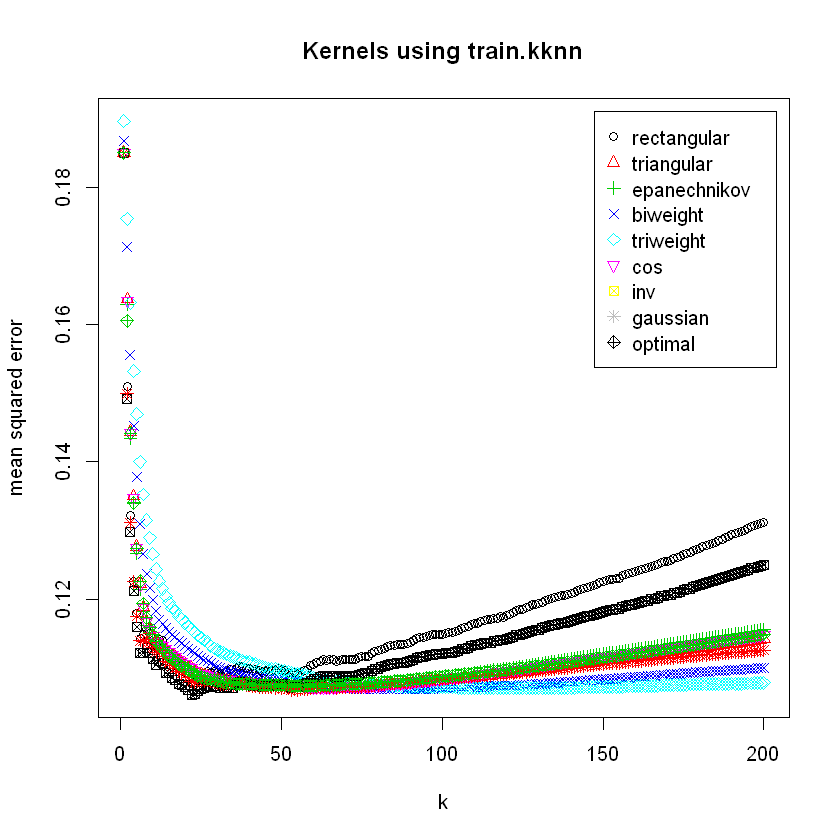

In [14]:
library(kernlab)
library(kknn)
library(data.table)
library(e1071)
library(caTools)
require(caTools)
set.seed(101)

data <- read.table("credit_card_data-headers.txt", header = TRUE)
kernels = c("rectangular", "triangular", "epanechnikov", "biweight", "triweight", "cos", "inv", "gaussian", "optimal")

cat("-------------------------------------BEGIN train.kknn method -------------------------------------------\n")
train_model <- train.kknn(R1~., data, kmax = 200, distance = 2, kernel = kernels, scale = TRUE)
train_model
plot(train_model)
title("Kernels using train.kknn")

best_train_kernel <- train_model$best.parameters$kernel
best_train_kval <- train_model$best.parameters$k
kknn_train_model <- train.kknn(R1~., data, ks=best_train_kval, distance = 2, kernel = best_train_kernel, scale = TRUE)
pred <- round(predict(kknn_train_model, data[,1:10]))
train_model_accuracy <- sum(pred == data[,11])/length(data[,11])
cat("\nBest Kernel is:",best_train_kernel,", Best K Value is:",best_train_kval,", and the accuracy is:",train_model_accuracy*100,"%\n")
cat("\n-------------------------------------END train.kknn method -------------------------------------------\n\n")
cat("\n-------------------------------------BEGIN cv.kknn method -------------------------------------------\n")
kvals <- c(1:100)
model_accuracy <- c()

for (i in 1:length(kernels)){
  for (j in 1:length(kvals)){
    cv_model <- cv.kknn(R1~., data= data, kcv = 10, scale = TRUE, kernel = kernels[i], k = kvals[j])
    cv_model <- data.table(cv_model[[1]])
    cv_model_accuracy <- sum(round(cv_model$yhat) == data$R1)/length(data$R1)
    model_accuracy <- c(model_accuracy, cv_model_accuracy)
  }
  cat("\nFor", kernels[i], "kernel, model accuracy is:", max(model_accuracy)*100,"% and corresponding k-value is:",kvals[which.max(model_accuracy[1:length(kvals)])])

}
cat("\n-------------------------------------END cv.kknn method -------------------------------------------\n")


### Question 3.1 (b):
````
Here, I am splitting the data to train, validate and test. I am using 4 different ratios :
(50%,25%,25%), (60%,20%,20%),  (70%,15%,15%), and (80%,10%,10%).
I am going to run the ksvm model on the split datasets to predict the best model classifier.
I am not going to use Rotating method at this point.

For the different ratios, I am predicting model accuracies for four different kernels. Iterating over kernels and cost values for each ratio, the best TEST ACCURACY is 90.90909% (for polydot kernel and 80/10/10 split). However this accuracy value is a lot higher compared to the training accuracy (85.27725%). "Anovadot" however, seems to be more legit. For a split ratio of 60/20/20, Test Accuracy is 89.39394 %, validation accuracy is 83.07692 % and training accuracy is 92.34694 %.

From Problem 2.1 (a) we concluded that rbfdot with C = 10000 had the best model accuracy. However, the accuracy for that parameters on test data was considerably lower at 80.80808%. 


````
#### Documentation on Stackoverflow showing examples to split data frame into train,validation and test datasets. 
https://stackoverflow.com/questions/36068963/r-how-to-split-a-data-frame-into-training-validation-and-test-sets


In [62]:
library(kernlab)
library(e1071)
library(caTools)
require(caTools)
set.seed(101)

data <- read.table("credit_card_data-headers.txt", header = TRUE)
kernel_list = c("vanilladot", "rbfdot", "anovadot", "polydot")

w <- c(0.5,0.25,0.25)
x <- c(0.6,0.2,0.2)
y <- c(0.7,0.15,0.15)
z <- c(0.8,0.1,0.1)
m <- list(w,x,y,z)

cost_value <- c()
kernel_val <- c()
train_frac_list <- c()
validate_frac_list <- c()
test_frac_list <- c()
Train_Accuracy  <- c()
Validation_Accuracy  <- c()
Test_Accuracy  <- c()

for (k1 in 1:length(kernel_list)){
    for (p in 1:length(m)){
        fractionTraining <- m[[p]][1]
        fractionValidation <- m[[p]][2]
        fractionTest <- m[[p]][3]

        sampleSizeTraining <- floor(fractionTraining * nrow(data))
        sampleSizeValidation <- floor(fractionValidation * nrow(data))
        sampleSizeTest <- floor(fractionTest * nrow(data))

        indicesTraining <- sort(sample(seq_len(nrow(data)), size=sampleSizeTraining))
        indicesNotTraining <- setdiff(seq_len(nrow(data)), indicesTraining)
        indicesValidation <- sort(sample(indicesNotTraining, size=sampleSizeValidation))
        indicesTest <- setdiff(indicesNotTraining, indicesValidation)

        dfTraining   <- data[indicesTraining, ]
        x_dfTraining <- dfTraining[,1:10]
        y_dfTraining <- dfTraining[,11]
        dfValidation <- data[indicesValidation, ]
        x_dfValidation <- dfValidation[,1:10]
        y_dfValidation <- dfValidation[,11]
        dfTest       <- data[indicesTest, ]
        x_dfTest <- dfTest[,1:10]
        y_dfTest <- dfTest[,11]

        cost_values = c(1, 10, 100, 1000, 10000, 0.1, 0.01, 0.001)
        train_accuracy <- c()
        prediction_train <- c()
        train_model <- c()

        for (i in 1:length(cost_values)){
          ksvm_model <- ksvm(as.matrix(x_dfTraining), as.factor(y_dfTraining), type = "C-svc", kernel = kernel_list[k1], C = cost_values[i], scaled = TRUE)
          a <- colSums(ksvm_model@xmatrix[[1]]*ksvm_model@coef[[1]])
          a0 <- ksvm_model@b
          accuracy <- sum(predict(ksvm_model,x_dfTraining) == y_dfTraining)/length(y_dfTraining)
          train_accuracy <- c(train_accuracy,accuracy)
          train_model <- c(train_model, ksvm_model)
          prediction_train <- c(prediction_train, predict(ksvm_model,x_dfTraining))
        }

        model <- train_model[which.max(train_accuracy[1:length(cost_values)])]
        C_val = cost_values[which.max(train_accuracy[1:length(cost_values)])]
        train_accuracy <- max(train_accuracy[1:length(cost_values)])

        validation_predict <- predict(model[[1]],x_dfValidation)
        validation_accuracy <- sum(validation_predict == y_dfValidation)/length(y_dfValidation)

        test_predict <- predict(model[[1]],x_dfTest)
        test_accuracy <- sum(test_predict == y_dfTest)/length(y_dfTest)

        Train_Accuracy <- c(Train_Accuracy, train_accuracy) 
        Validation_Accuracy <- c(Validation_Accuracy, validation_accuracy) 
        Test_Accuracy <- c(Test_Accuracy, test_accuracy)
        cost_value <- c(cost_value, C_val)
        train_frac_list <- c(train_frac_list, fractionTraining*100)
        validate_frac_list <- c(validate_frac_list, fractionValidation*100)
        test_frac_list <- c(test_frac_list, fractionTest*100)
        kernel_val <- c(kernel_val, kernel_list[k1])
    }
}
df <- data.frame(kernel_val, cost_value, train_frac_list, validate_frac_list, test_frac_list, Train_Accuracy*100, Validation_Accuracy*100, Test_Accuracy*100)
names(df) <- c("Kernel","Cost Value","Train Split %","Validate Split %","Test Split %","Train Accuracy %","Validate Accuracy %","Test Accuracy %")
df[order(df["Test Accuracy %"], decreasing = TRUE), ]


 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 

,Kernel,Cost Value,Train Split %,Validate Split %,Test Split %,Train Accuracy %,Validate Accuracy %,Test Accuracy %
16,polydot,1,80,10,10,85.27725,90.76923,90.90909
14,polydot,1,60,20,20,85.96939,83.07692,90.15152
2,vanilladot,1,60,20,20,85.96939,84.61538,89.39394
10,anovadot,10000,60,20,20,92.34694,83.07692,89.39394
15,polydot,1,70,15,15,85.12035,89.79592,88.88889
11,anovadot,10000,70,15,15,89.71554,90.81633,86.86869
13,polydot,1,50,25,25,86.23853,87.11656,85.36585
4,vanilladot,1,80,10,10,86.61568,86.15385,84.84848
1,vanilladot,1,50,25,25,85.32110,90.18405,84.14634
9,anovadot,10000,50,25,25,94.80122,80.36810,84.14634
